In [1]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

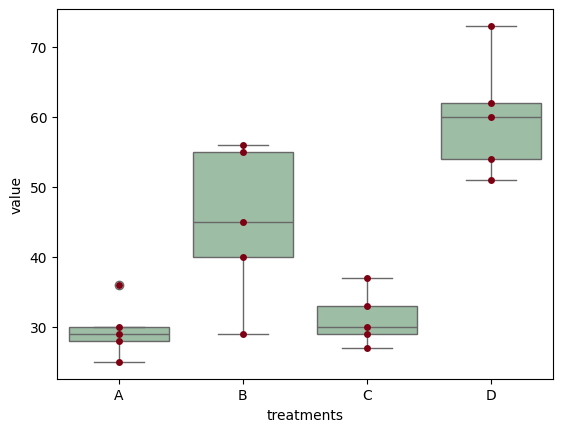

In [2]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [3]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [4]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [5]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary
# output (ANOVA F and p value)

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [8]:
# df_melt['value'] = pd.to_numeric(df_melt['value'], errors='coerce')
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df_melt['treatments'])

df_melt['treatments'] =  label
print(df_melt.dtypes)

index         int64
treatments    int64
value         int64
dtype: object


In [10]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary
# output
# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,15.4,1.692871,29.107129,4.546156,0.025070
1,0,2,1.6,-12.107129,15.307129,0.472328,0.900000
2,0,3,30.4,16.692871,44.107129,8.974231,0.001000
3,1,2,13.8,0.092871,27.507129,4.073828,0.048178
4,1,3,15.0,1.292871,28.707129,4.428074,0.029578
5,2,3,28.8,15.092871,42.507129,8.501903,0.001000


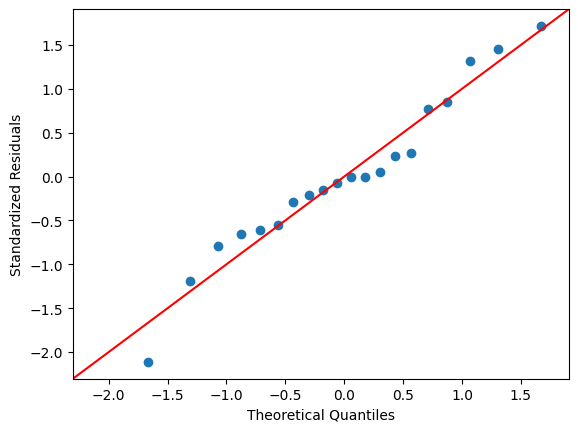

In [11]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

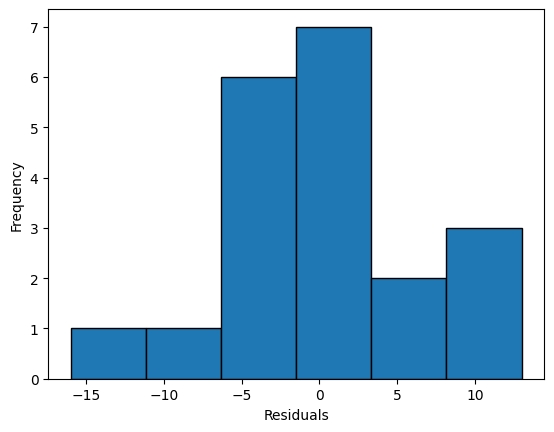

In [13]:
# histogram
plt.hist(res.anova_model_out.resid, bins=6, histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [14]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685018062591553 0.7229723930358887


In [15]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


In [16]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary
# output

,Parameter,Value
0,Test statistics (T),5.6878
1,Degrees of freedom (Df),3.0000
2,p value,0.1278


In [17]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary
# output

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667


In [18]:
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


In [31]:
d_melt

,Genotype,years,value
0,0,0,1.53
1,0,0,1.83
2,0,0,1.38
3,1,0,3.60
4,1,0,2.94
5,1,0,4.02
6,2,0,3.99
7,2,0,3.30
8,2,0,4.41
9,3,0,3.75


<Axes: xlabel='Genotype', ylabel='value'>

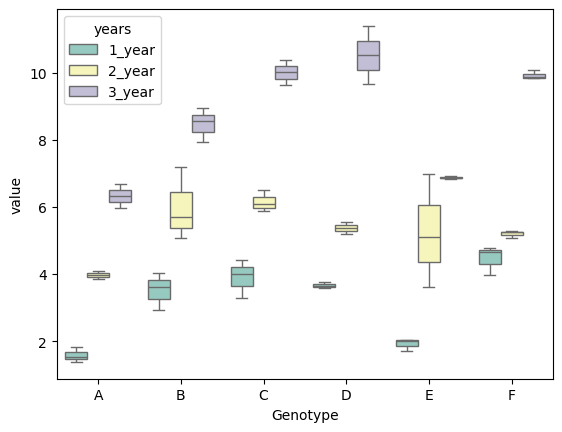

In [19]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [32]:
# ESS = Between = T1*T2-1 = 3*6-1 = 17 = 5+2+10
# T1 = 6-1
# T2 = 3-1
# Interation = T1-1*T2-2 = 5*2 = 10
# Res = (n-1)*T1*T2 = 2*6*3 = 36 = 54-5-2-10-1 
# total = n*T1*T2 - 1 = 3*6*3  = 54-1 = 53

18

In [21]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=d_melt, res_var='value', anova_model='value~C(Genotype)+C(years)+C(Genotype):C(years)')
res.anova_summary
# output

,df,sum_sq,mean_sq,F,PR(>F)
C(Genotype),5.0,58.551733,11.710347,32.748581,1.931655e-12
C(years),2.0,278.925633,139.462817,390.014868,4.006243e-25
C(Genotype):C(years),10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN


/home/xenakas/.venv/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x7f44d812ac00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


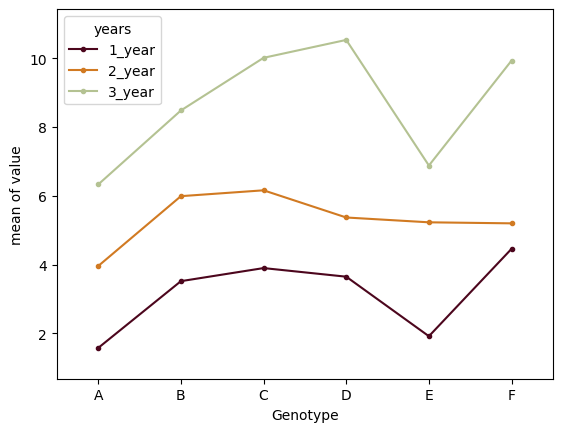

In [22]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()


In [23]:
# df_melt['value'] = pd.to_numeric(df_melt['value'], errors='coerce')
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(d_melt['Genotype'])

d_melt['Genotype'] =  label

label = le.fit_transform(d_melt['years'])

d_melt['years'] =  label



print(df_melt.dtypes)

index         int64
treatments    int64
value         int64
dtype: object


In [24]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='Genotype', anova_model='value~C(Genotype)+C(years)+C(Genotype):C(years)')
res.tukey_summary


# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,2.040000,1.191912,2.888088,10.234409,0.001000
1,0,2,2.733333,1.885245,3.581421,13.712771,0.001000
2,0,3,2.560000,1.711912,3.408088,12.843180,0.001000
3,0,4,0.720000,-0.128088,1.568088,3.612145,0.135306
4,0,5,2.573333,1.725245,3.421421,12.910072,0.001000
5,1,2,0.693333,-0.154755,1.541421,3.478361,0.163609
6,1,3,0.520000,-0.328088,1.368088,2.608771,0.453066
7,1,4,1.320000,0.471912,2.168088,6.622265,0.001000
8,1,5,0.533333,-0.314755,1.381421,2.675663,0.425189
9,2,3,0.173333,-0.674755,1.021421,0.869590,0.900000


In [25]:
# for main effect years
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='years', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary

# 1_year vs	2_year, etc. 	

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,2.146667,1.659513,2.633821,15.230432,0.001
1,0,2,5.521667,5.034513,6.008821,39.175794,0.001
2,1,2,3.375000,2.887846,3.862154,23.945361,0.001


In [26]:
# for interaction effect between genotype and years
res.tukey_hsd(df=d_melt, res_var='value', xfac_var=['Genotype','years'], anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary.head()

# (A, 1_year) vs (A, 2_year), etc.

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(0, 0)","(0, 1)",2.38,0.548861,4.211139,6.893646,0.002439
1,"(0, 0)","(0, 2)",4.75,2.918861,6.581139,13.758326,0.001000
2,"(0, 0)","(1, 0)",1.94,0.108861,3.771139,5.619190,0.028673
3,"(0, 0)","(1, 1)",4.41,2.578861,6.241139,12.773520,0.001000
4,"(0, 0)","(1, 2)",6.90,5.068861,8.731139,19.985779,0.001000


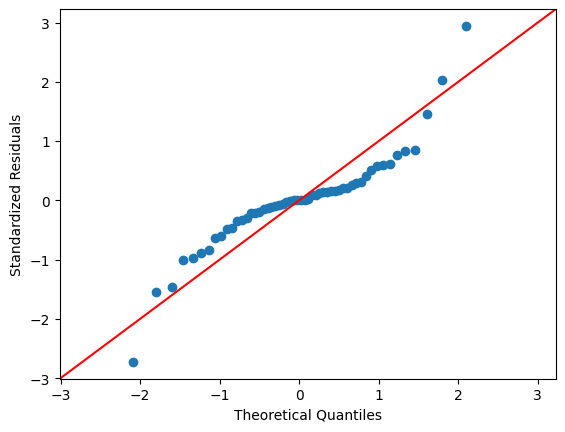

In [27]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

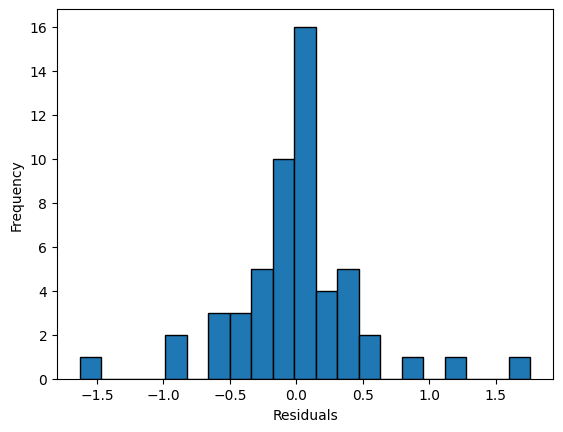

In [28]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [29]:
# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

0.8978845477104187 0.00023986827000044286


In [30]:
# if you have  a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=d_melt, res_var='value', xfac_var=['Genotype', 'years'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.6849
1,Degrees of freedom (Df),17.0000
2,p value,0.0927
